In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

Using TensorFlow backend.


In [2]:
# Load data and split into training and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Split training set further into training and validation sets
sample_size = 40000
X_train, X_val, y_train, y_val = train_images[:sample_size], train_images[sample_size:sample_size*2],  train_labels[:sample_size], train_labels[sample_size:sample_size*2]

In [4]:
# Randomly select a defined number of image paires from a given dataset
def get_left_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            image_list_left.append(image_A)
            image_list_right.append(image_B)
            
        elif label_A > label_B: 
            image_list_left.append(image_B)
            image_list_right.append(image_A)
           
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right , image_combination_labels

In [5]:
# Randomly select a defined number of image paires from a given dataset
def get_right_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            image_list_left.append(image_B)
            image_list_right.append(image_A)

        elif label_A > label_B: 
            image_list_left.append(image_A)
            image_list_right.append(image_B)
   
        # Append newly generated image combination and minimum label to list
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right , image_combination_labels

In [6]:
# Randomly select a defined number of image paires from a given dataset
def get_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_list_left = []
    image_list_right = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        # Append newly generated image combination and minimum label to list
        image_list_left.append(image_A)
        
        # Append newly generated image combination and minimum label to list
        image_list_right.append(image_B)
        
        # Append labels
        image_combination_labels.append(minimum_label)
        
    # Convert image data and labels lists to numpy arrays
    image_list_left = np.array(image_list_left)
    image_list_right = np.array(image_list_right)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_list_left, image_list_right, image_combination_labels

In [7]:
combo_train_X_1, combo_train_X_2, combo_train_y = get_image_combinations(40000, X_train, y_train)
#combo_val_X_1, combo_val_X_2, combo_val_y = get_image_combinations(20000, X_val, y_val)

In [11]:
combo_train_X_1 = combo_train_X_1.reshape(40000, 784).astype("float32") / 255
combo_train_X_2 = combo_train_X_2.reshape(40000, 784).astype("float32") / 255

In [68]:
def build_DNN_2_inputs():

    inputs_1 = keras.Input(shape=(28*28,))
    inputs_2 = keras.Input(shape=(28*28,))

    # Merge all available features into a single large vector via concatenation
    x = layers.concatenate([inputs_1, inputs_2])

    dense = layers.Dense(512, activation="relu")
    x = dense(x)
    outputs = layers.Dense(10, "softmax")(x)
    
    model = keras.Model(inputs=[inputs_1, inputs_2], 
                        outputs=outputs)

    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy"],
    )
    
    return model

In [69]:
model = build_DNN_2_inputs()

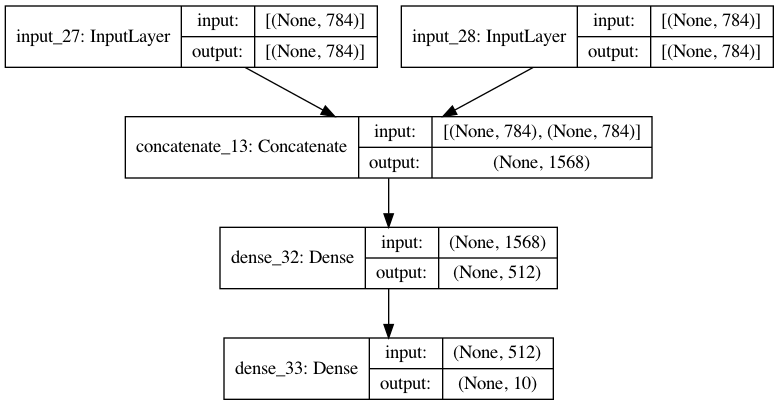

In [70]:
keras.utils.plot_model(model, show_shapes=True)

In [71]:
model.fit([combo_train_X_1, combo_train_X_2], 
                    combo_train_y,
                    batch_size=64, 
                    epochs=8)

Epoch 1/8
625/625 [==============================] - 2s 3ms/step - loss: 0.6043 - accuracy: 0.8024
Epoch 2/8
625/625 [==============================] - 2s 3ms/step - loss: 0.2895 - accuracy: 0.9079
Epoch 3/8
625/625 [==============================] - 2s 3ms/step - loss: 0.1921 - accuracy: 0.9393
Epoch 4/8
625/625 [==============================] - 2s 3ms/step - loss: 0.1339 - accuracy: 0.9573
Epoch 5/8
625/625 [==============================] - 2s 3ms/step - loss: 0.0934 - accuracy: 0.9706
Epoch 6/8
625/625 [==============================] - 2s 3ms/step - loss: 0.0643 - accuracy: 0.9801
Epoch 7/8
625/625 [==============================] - 2s 3ms/step - loss: 0.0438 - accuracy: 0.9869
Epoch 8/8
625/625 [==============================] - 2s 3ms/step - loss: 0.0297 - accuracy: 0.9905


In [57]:
inputs_1 = keras.Input(shape=(28*28,))
inputs_2 = keras.Input(shape=(28*28,))

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([inputs_1, inputs_2])

dense = layers.Dense(64, activation="relu")
x = dense(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=[inputs_1, inputs_2], 
                    outputs=outputs, name="mnist_model")

In [24]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

# model.compile(optimizer='rmsprop', 
#         loss='categorical_crossentropy', 
#         metrics=['accuracy', 'mae'])


history = model.fit([combo_train_X_1, combo_train_X_2], 
                    y_train,
                    batch_size=64, 
                    epochs=2)

# test_scores = model.evaluate([x_test_1, 
#                               x_test_2], 
#                               y_test, 
#                               verbose=2)
# print("Test loss:", test_scores[0])
# print("Test accuracy:", test_scores[1])

Epoch 1/2
625/625 [==============================] - 1s 1ms/step - loss: 2.3008 - accuracy: 0.1135
Epoch 2/2
625/625 [==============================] - 1s 1ms/step - loss: 2.3002 - accuracy: 0.1143


In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("Trained_Models/Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Trained_Models/Model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
# Verify above by visually inspecting images from the predicted set
num_val_images = 10000

Predicted: 5
True: 7


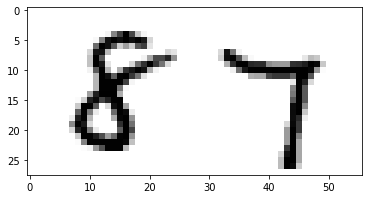

In [21]:
# Run this cell repeatedly to see multiple examples
check_index = random.randint(0,num_val_images)
plt.imshow(val_images[check_index].reshape(28,56), cmap = plt.cm.binary)
print("Predicted: " + str(np.argmax(y_predict[check_index])))
print("True: " + str(np.argmax(val_labels[check_index])))